In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c
import seaborn as sns

In [19]:
import os
import shutil
import time

In [3]:
#This imports the necessary path to draw the single pad transmon design. 
import sys
sys.path.append('Customized_Components')
from rounded_single_pad import Round_TransmonPocket_Single as transmon
import Transmon_property as trans_p
import Transmon_specifications as jj

import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [4]:
import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [5]:
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings

from qiskit_metal.qlibrary.couplers.coupled_line_tee import CoupledLineTee

from qiskit_metal.qlibrary.tlines.mixed_path import RouteMixed
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight

In [6]:
phi0 = c.h/2/c.e.si
T = 30*u.mK
epsilon_r = 11.45
cc = 1664080*u.fF/u.m

In [7]:
design = designs.DesignPlanar({}, True)
design.chips.main.size['size_x'] = '20 mm'
design.chips.main.size['size_y'] = '10 mm'

design.variables['cpw_width'] = '15.9 um'
design.variables['cpw_gap'] = '9 um'

design.variables['trace_width'] = '12.4 um'
cpw_pin_width = 12.4*u.um
design.variables['trace_gap'] = '7 um'
cpw_gap = 7*u.um

design.variables['pad_buffer_radius'] = '30 um'
design.variables['buffer_resolution'] = '10'
design.variables['connection_pad_buffer_radius'] = '2 um'

# design.chips['main']['material'] = 'Silicon'

gui = MetalGUI(design)

Component-specific variables

In [8]:


qb_options = dict(
pad_pocket_distance_top = '40um',
connection_pads = dict(
    a = dict(loc_W  = 0, 
            loc_H =  1, 
            pad_gap = '10um',
            pad_height = '20um',
            pad_width = '80um',
            pad_cpw_extent =  '10um',
            pocket_rise = '0um',
            cpw_extend = '0um',
            pocket_extent = '0um')))


TQ_options = dict(prime_width = design.variables['cpw_width'],
               prime_gap = design.variables['cpw_gap'],
               second_width = design.variables['trace_width'],
               second_gap = design.variables['trace_gap'],
               down_length = '60um',
               coupling_space = '5um',
               open_termination=False,
               hfss_wire_bonds = False,
               q3d_wire_bonds = False)

CPW_options = Dict(trace_width = design.variables['trace_width'],
               trace_gap  = design.variables['trace_gap'],
        total_length='5 mm',
        hfss_wire_bonds = True,
        q3d_wire_bonds = True,
        fillet='30 um',
        lead = dict(start_straight='20um', end_straight = '50um'),
        pin_inputs=Dict(
            start_pin=Dict(component='Q1', pin='a'),
            end_pin=Dict(component='TQ1', pin='second_end')), )

pin_inputs = Dict(
            start_pin=Dict(component='Q1', pin='a'),
            end_pin=Dict(component='TQ1', pin='second_end'))

trans_options = Dict(hfss_wire_bonds = True,
                     q3d_wirebonds = True,
               pin_inputs=Dict(
                 start_pin=Dict(
                     component='TQ1',
                     pin='prime_start'),
                 end_pin=Dict(
                     component='TQ2',
                     pin='prime_end')))


## Single Pad--Verify Design

### Draw the single pad transmon

In [9]:
design.delete_all_components()

In [10]:
design.overwrite_enabled = True

size = 0.25*u.mm
gap = 30*u.um
size = size.to(u.um)
pocket_width = size+2*gap


op = Dict(
    pos_x = '0',
    pad_height = '{}um'.format(size.value),
    pos_y = '0',
    pad_width = '{}'.format(size),
    pocket_width = '{}'.format(pocket_width), 
    **qb_options)

q1 = transmon(design,'Q1',options = op)

gui.rebuild()
gui.zoom_on_components(['Q1'])


In [11]:
from qiskit_metal.analyses.quantization import LOManalysis
from qiskit_metal.analyses.quantization import EPRanalysis


In [12]:
renderer_hfss = design.renderers.hfss
renderer_q3d = design.renderers.q3d

In [13]:
c1 = LOManalysis(design, "q3d")
c1.sim.setup.min_passes  = 10
c1.sim.setup.max_passes = 25
c1.sim.setup.freq_ghz = 5

c1.sim.renderer.options['wb_threshold'] ='72um'
c1.sim.renderer.options['x_buffer_width_mm'] = 0.5
c1.sim.renderer.options['y_buffer_width_mm'] = 0.5

In [14]:
eig_all = EPRanalysis(design, 'hfss')

hfss = eig_all.sim.renderer

# eig_all.sim.renderer.options['Lj'] = '13nH'
eig_all.sim.renderer.options['wb_threshold'] = '72um'

eig_all.sim.setup.max_passes = 30
eig_all.sim.setup.max_delta_f = 0.1
eig_all.sim.setup.n_modes = 1
# eig_all.sim.setup.vars = Dict(Lj1= '13 nH', Cj1= '0 fF')
eig_all.sim.renderer.options['x_buffer_width_mm'] = 0.5
eig_all.sim.renderer.options['y_buffer_width_mm'] = 0.5

In [28]:
datas = pd.DataFrame()

In [29]:
original = r'C:\Users\slab\Desktop\Wendy-qiskit-code\ansys.png'
path = r'C:\Users\slab\Desktop\Wendy-qiskit-code\Ansys_screenshoots\Simulation_0402'

In [17]:
jj.find_junction_capacitance(int(Lj[:-2])*u.nH)

NameError: name 'Lj' is not defined

Loop

INFO 01:22PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 01:22PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 01:22PM [analyze]: Analyzing setup Setup
INFO 01:23PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpqd9ir22y.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:23PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpxj9jmbf2.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:23PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpcv_s_xou.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 01:23PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpnvvbxozt.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, 

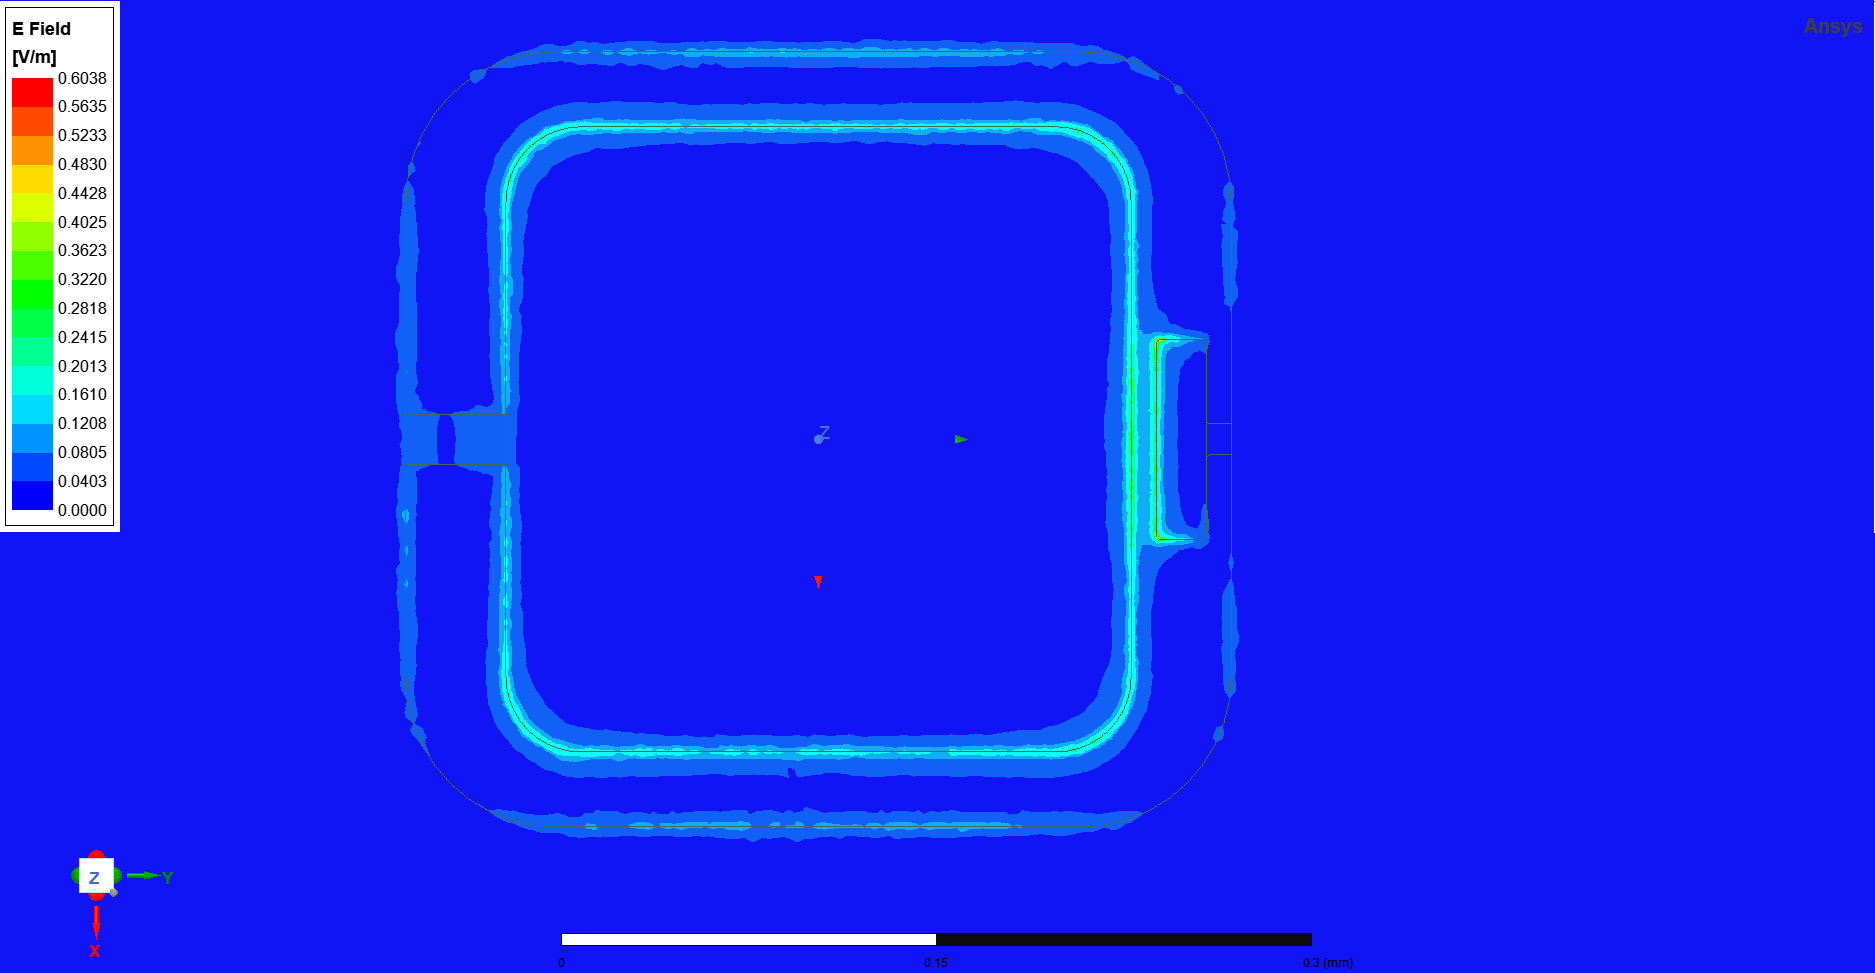

saddd
Design "all_freqs_hfss" info:
	# eigenmodes    1
	# variations    1
Design "all_freqs_hfss" info:
	# eigenmodes    1
	# variations    1


  options=pd.Series(get_instance_vars(self.options)),




        energy_elec_all       = 2.81416797161966e-25
        energy_elec_substrate = 2.58125531353895e-25
        EPR of substrate = 91.7%

        energy_mag    = 7.2994451096209e-27
        energy_mag % of energy_elec_all  = 2.6%
        

Variation 0  [1/1]


  Ljs = pd.Series({})

  Cjs = pd.Series({})

  _Om = pd.Series({})




  Mode 0 at 4.70 GHz   [1/1]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})

  Qp = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               97.4%  1.407e-25  3.65e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 98.28%
	jj1              1.03161  (+)        0.0180026
		(U_tot_cap-U_tot_ind)/mean=-1.91%


  sol = sol.append(self.get_Qdielectric(



Calculating Qdielectric_main for mode 0 (0/0)
p_dielectric_main_0 = 0.9172356943758905


  options=pd.Series(get_instance_vars(self.options)),

WARNING 01:25PM [__init__]: <p>Error: <class 'IndexError'></p>
  result['Q_coupling'] = self.Qm_coupling[variation][self.Qm_coupling[variation].columns[junctions]][modes]#TODO change the columns to junctions

  result['Qs'] = self.Qs[variation][self.PM[variation].columns[junctions]][modes] #TODO change the columns to junctions




ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project38\all_freqs_hfss\2023-04-02 13-25-01.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    0.962142
dtype: float64

Pm_norm idx =
    jj1
0  True
*** P (participation matrix, not normlz.)
       jj1
0  1.01337

*** S (sign-bit matrix)
   s_jj1
0     -1
*** P (participation matrix, normalized.)
      0.98

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       161

*** Chi matrix ND (MHz) 
       173

*** Frequencies O1 PT (MHz)
0    4540.590494
dtype: float64

*** Frequencies ND (MHz)
0    4534.782053
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj1,10
0,4534.78


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

,,0
Lj1,,
10,0,173.21


INFO 01:25PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 01:25PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 01:25PM [analyze]: Analyzing setup Setup
INFO 01:26PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmp5x18w5dc.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:26PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmp_3s3k8p_.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:26PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpxfy34rcj.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 01:26PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpi1qcjyhq.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, 

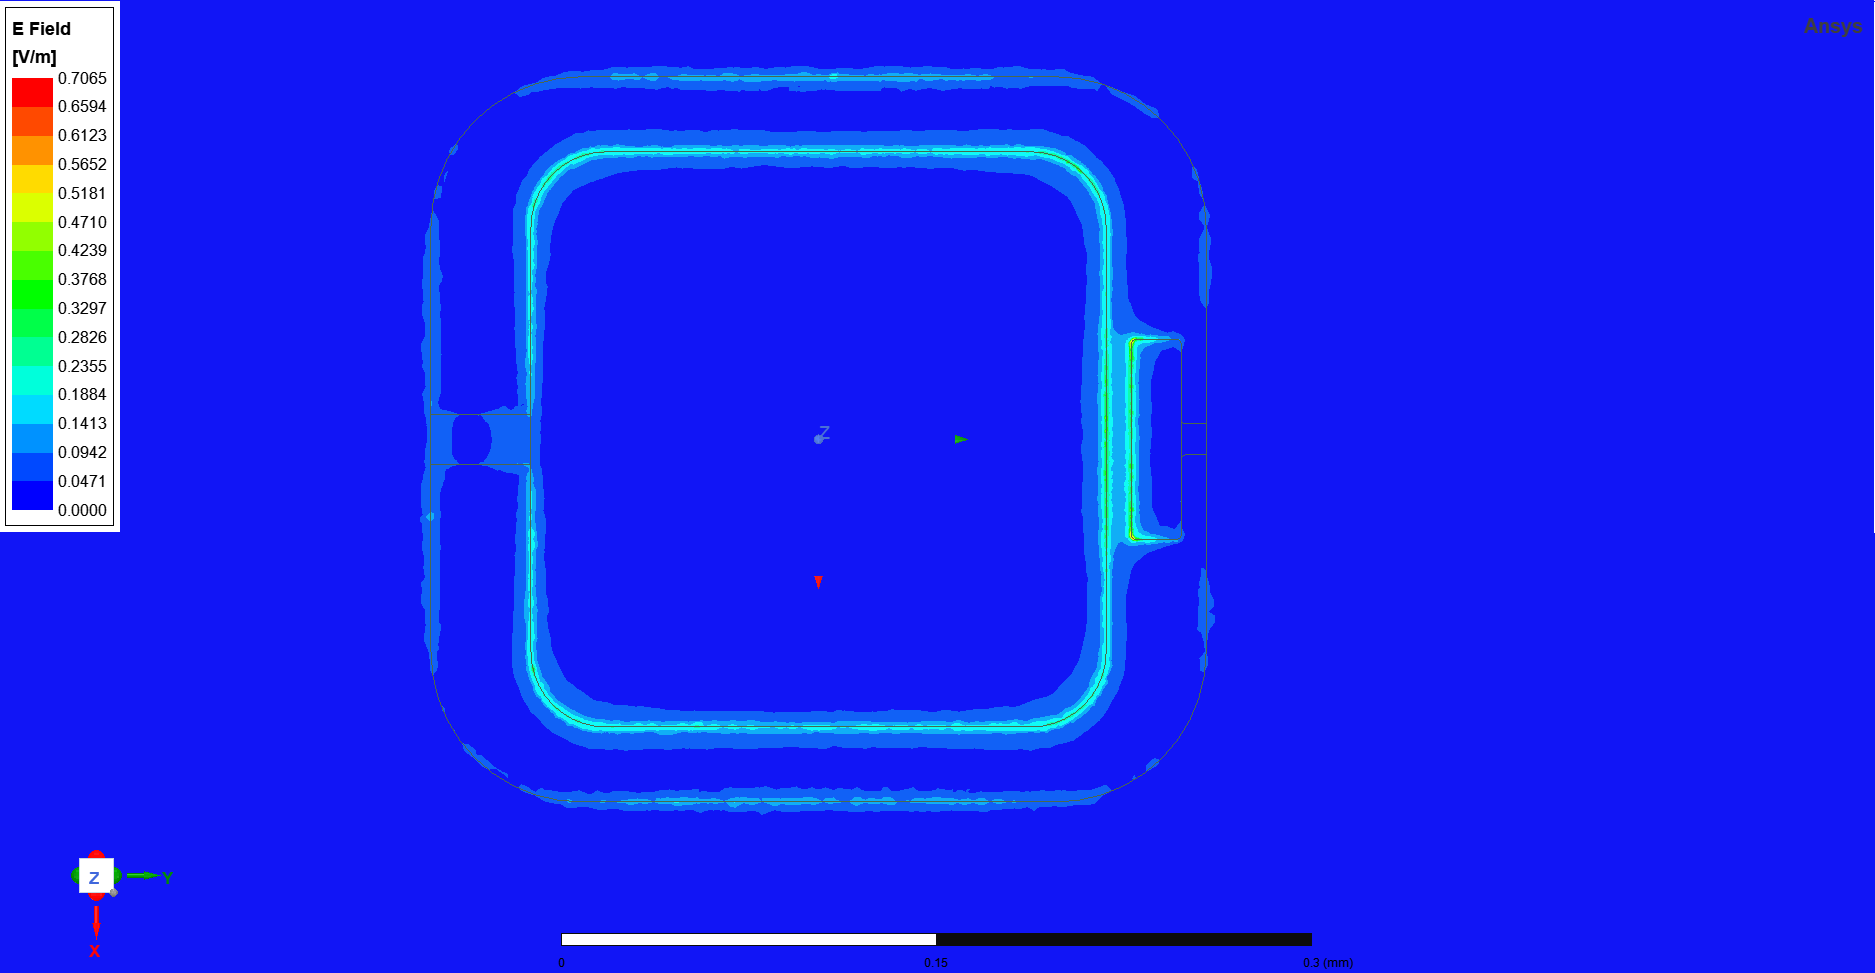

saddd
Design "all_freqs_hfss" info:
	# eigenmodes    1
	# variations    1
Design "all_freqs_hfss" info:
	# eigenmodes    1
	# variations    1


  options=pd.Series(get_instance_vars(self.options)),




        energy_elec_all       = 3.23227906871545e-25
        energy_elec_substrate = 2.96615745042636e-25
        EPR of substrate = 91.8%

        energy_mag    = 1.08381688835383e-26
        energy_mag % of energy_elec_all  = 3.4%
        

Variation 0  [1/1]


  Ljs = pd.Series({})

  Cjs = pd.Series({})

  _Om = pd.Series({})




  Mode 0 at 4.94 GHz   [1/1]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               96.6%  1.616e-25 5.419e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)


  Qp = pd.Series({})

  sol = sol.append(self.get_Qdielectric(



		Energy fraction (Lj over Lj&Cj)= 98.11%
	jj1              1.03646  (+)        0.0199357
		(U_tot_cap-U_tot_ind)/mean=-2.39%
Calculating Qdielectric_main for mode 0 (0/0)
p_dielectric_main_0 = 0.9176674994232938


  options=pd.Series(get_instance_vars(self.options)),

WARNING 01:27PM [__init__]: <p>Error: <class 'IndexError'></p>
  result['Q_coupling'] = self.Qm_coupling[variation][self.Qm_coupling[variation].columns[junctions]][modes]#TODO change the columns to junctions

  result['Qs'] = self.Qs[variation][self.PM[variation].columns[junctions]][modes] #TODO change the columns to junctions




ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project38\all_freqs_hfss\2023-04-02 13-27-49.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    0.952484
dtype: float64

Pm_norm idx =
    jj1
0  True
*** P (participation matrix, not normlz.)
        jj1
0  1.016198

*** S (sign-bit matrix)
   s_jj1
0      1
*** P (participation matrix, normalized.)
      0.97

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       175

*** Chi matrix ND (MHz) 
       189

*** Frequencies O1 PT (MHz)
0    4761.135919
dtype: float64

*** Frequencies ND (MHz)
0    4754.645388
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj1,10
0,4754.65


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

,,0
Lj1,,
10,0,188.51


INFO 01:27PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 01:27PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 01:27PM [analyze]: Analyzing setup Setup
INFO 01:28PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpf5_9fut9.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:28PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmp4hpgz9wm.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:28PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpc0k_9hmi.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 01:28PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmp04fvhjpp.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, 

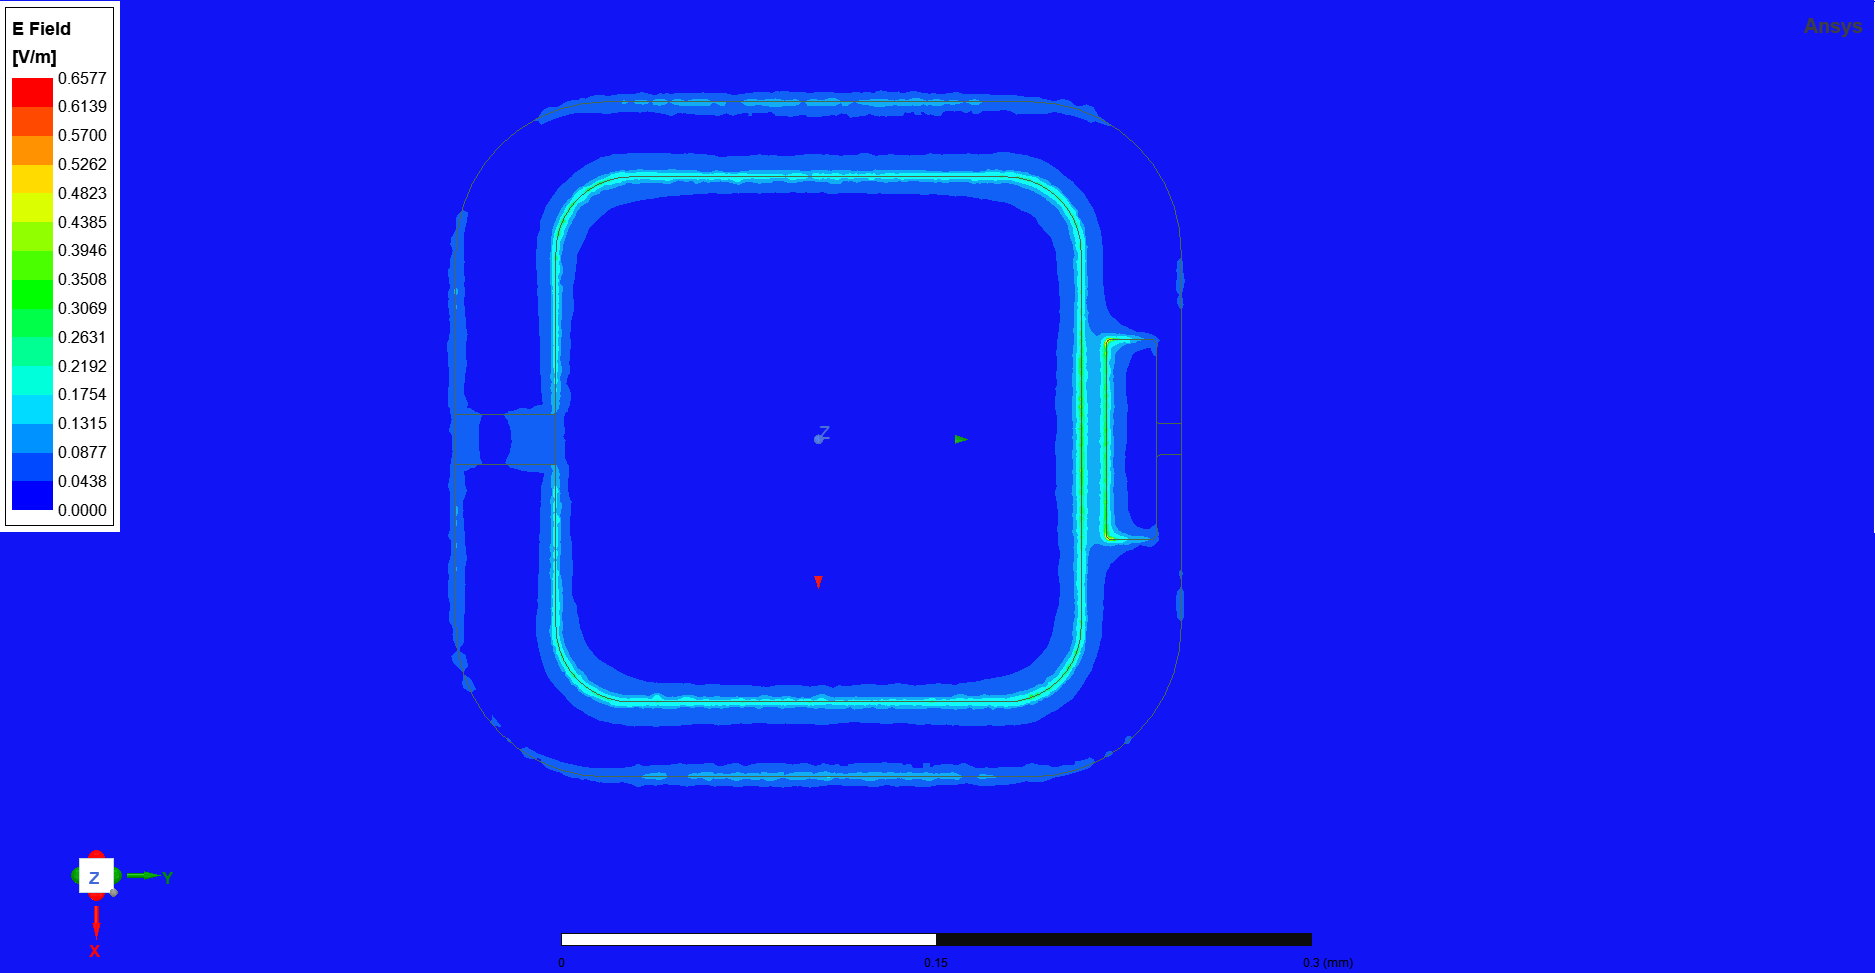

saddd
Design "all_freqs_hfss" info:
	# eigenmodes    1
	# variations    1
Design "all_freqs_hfss" info:
	# eigenmodes    1
	# variations    1


  options=pd.Series(get_instance_vars(self.options)),




        energy_elec_all       = 2.58629255783007e-25
        energy_elec_substrate = 2.37400516709753e-25
        EPR of substrate = 91.8%

        energy_mag    = 8.70057338668877e-27
        energy_mag % of energy_elec_all  = 3.4%
        

Variation 0  [1/1]


  Ljs = pd.Series({})

  Cjs = pd.Series({})

  _Om = pd.Series({})




  Mode 0 at 5.20 GHz   [1/1]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               96.6%  1.293e-25  4.35e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)


  Qp = pd.Series({})

  sol = sol.append(self.get_Qdielectric(



		Energy fraction (Lj over Lj&Cj)= 97.91%
	jj1              1.04195  (+)        0.0222531
		(U_tot_cap-U_tot_ind)/mean=-2.54%
Calculating Qdielectric_main for mode 0 (0/0)
p_dielectric_main_0 = 0.9179182609910721


  options=pd.Series(get_instance_vars(self.options)),

WARNING 01:30PM [__init__]: <p>Error: <class 'IndexError'></p>
  result['Q_coupling'] = self.Qm_coupling[variation][self.Qm_coupling[variation].columns[junctions]][modes]#TODO change the columns to junctions

  result['Qs'] = self.Qs[variation][self.PM[variation].columns[junctions]][modes] #TODO change the columns to junctions




ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project38\all_freqs_hfss\2023-04-02 13-30-32.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    0.949629
dtype: float64

Pm_norm idx =
    jj1
0  True
*** P (participation matrix, not normlz.)
       jj1
0  1.01927

*** S (sign-bit matrix)
   s_jj1
0     -1
*** P (participation matrix, normalized.)
      0.97

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       194

*** Chi matrix ND (MHz) 
       210

*** Frequencies O1 PT (MHz)
0    5007.086799
dtype: float64

*** Frequencies ND (MHz)
0    4999.457422
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj1,10
0,4999.46


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

,,0
Lj1,,
10,0,210.16


INFO 01:30PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 01:30PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 01:30PM [analyze]: Analyzing setup Setup
INFO 01:31PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpgws0a869.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:31PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpyxrh1ey6.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:31PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmp9xkbea0q.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 01:31PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpwk30_lxp.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, 

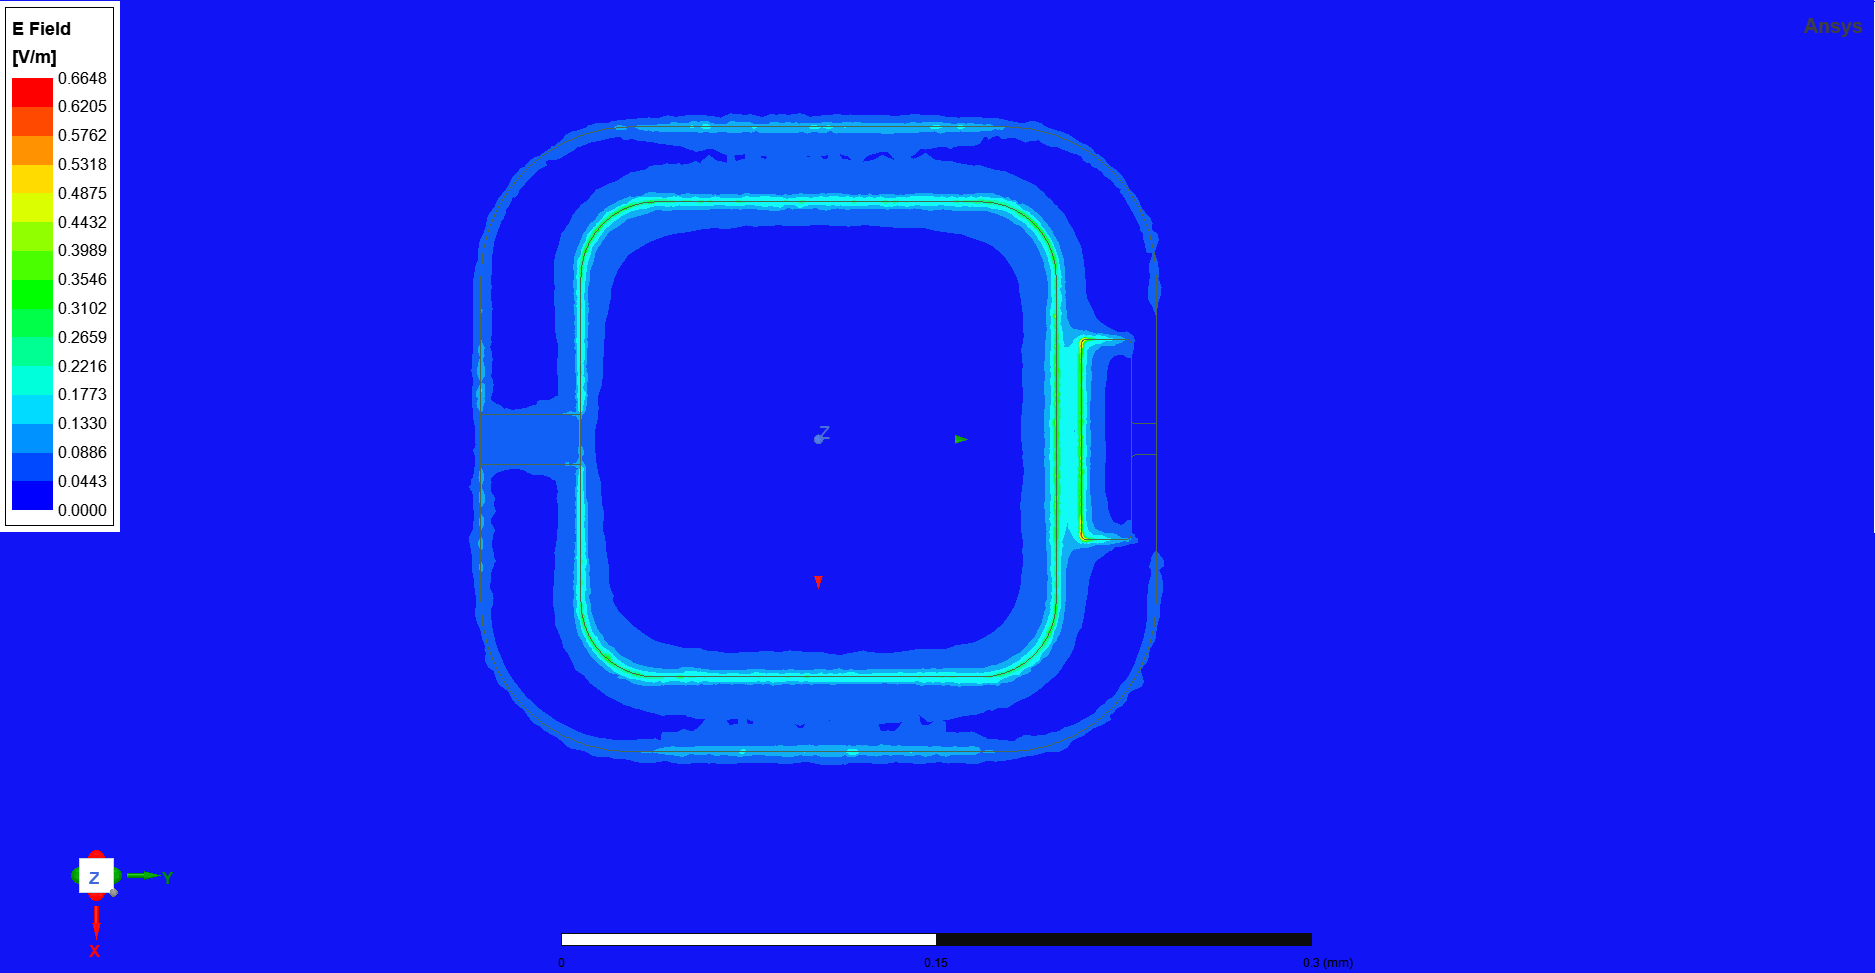

saddd
Design "all_freqs_hfss" info:
	# eigenmodes    1
	# variations    1
Design "all_freqs_hfss" info:
	# eigenmodes    1
	# variations    1


  options=pd.Series(get_instance_vars(self.options)),




        energy_elec_all       = 3.37645323513775e-25
        energy_elec_substrate = 3.10041313025113e-25
        EPR of substrate = 91.8%

        energy_mag    = 2.1544816629903e-27
        energy_mag % of energy_elec_all  = 0.6%
        

Variation 0  [1/1]


  Ljs = pd.Series({})

  Cjs = pd.Series({})

  _Om = pd.Series({})




  Mode 0 at 5.51 GHz   [1/1]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.4%  1.688e-25 1.077e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)


  Qp = pd.Series({})

  sol = sol.append(self.get_Qdielectric(



		Energy fraction (Lj over Lj&Cj)= 97.66%
	jj1              1.04864  (+)        0.0251264
		(U_tot_cap-U_tot_ind)/mean=-1.44%
Calculating Qdielectric_main for mode 0 (0/0)
p_dielectric_main_0 = 0.9182455417969506


  options=pd.Series(get_instance_vars(self.options)),

WARNING 01:33PM [__init__]: <p>Error: <class 'IndexError'></p>
  result['Q_coupling'] = self.Qm_coupling[variation][self.Qm_coupling[variation].columns[junctions]][modes]#TODO change the columns to junctions

  result['Qs'] = self.Qs[variation][self.PM[variation].columns[junctions]][modes] #TODO change the columns to junctions




ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project38\all_freqs_hfss\2023-04-02 13-33-15.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    0.971579
dtype: float64

Pm_norm idx =
    jj1
0  True
*** P (participation matrix, not normlz.)
        jj1
0  1.022938

*** S (sign-bit matrix)
   s_jj1
0      1
*** P (participation matrix, normalized.)
      0.99

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       229

*** Chi matrix ND (MHz) 
       252

*** Frequencies O1 PT (MHz)
0    5279.577032
dtype: float64

*** Frequencies ND (MHz)
0    5269.071691
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj1,10
0,5269.07


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

,,0
Lj1,,
10,0,251.57


INFO 01:33PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 01:33PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 01:33PM [analyze]: Analyzing setup Setup
INFO 01:34PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpkuf5ki9h.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:34PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpzg3rtwgz.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:34PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpznslq2yy.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 01:34PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmp26dez0l_.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, 

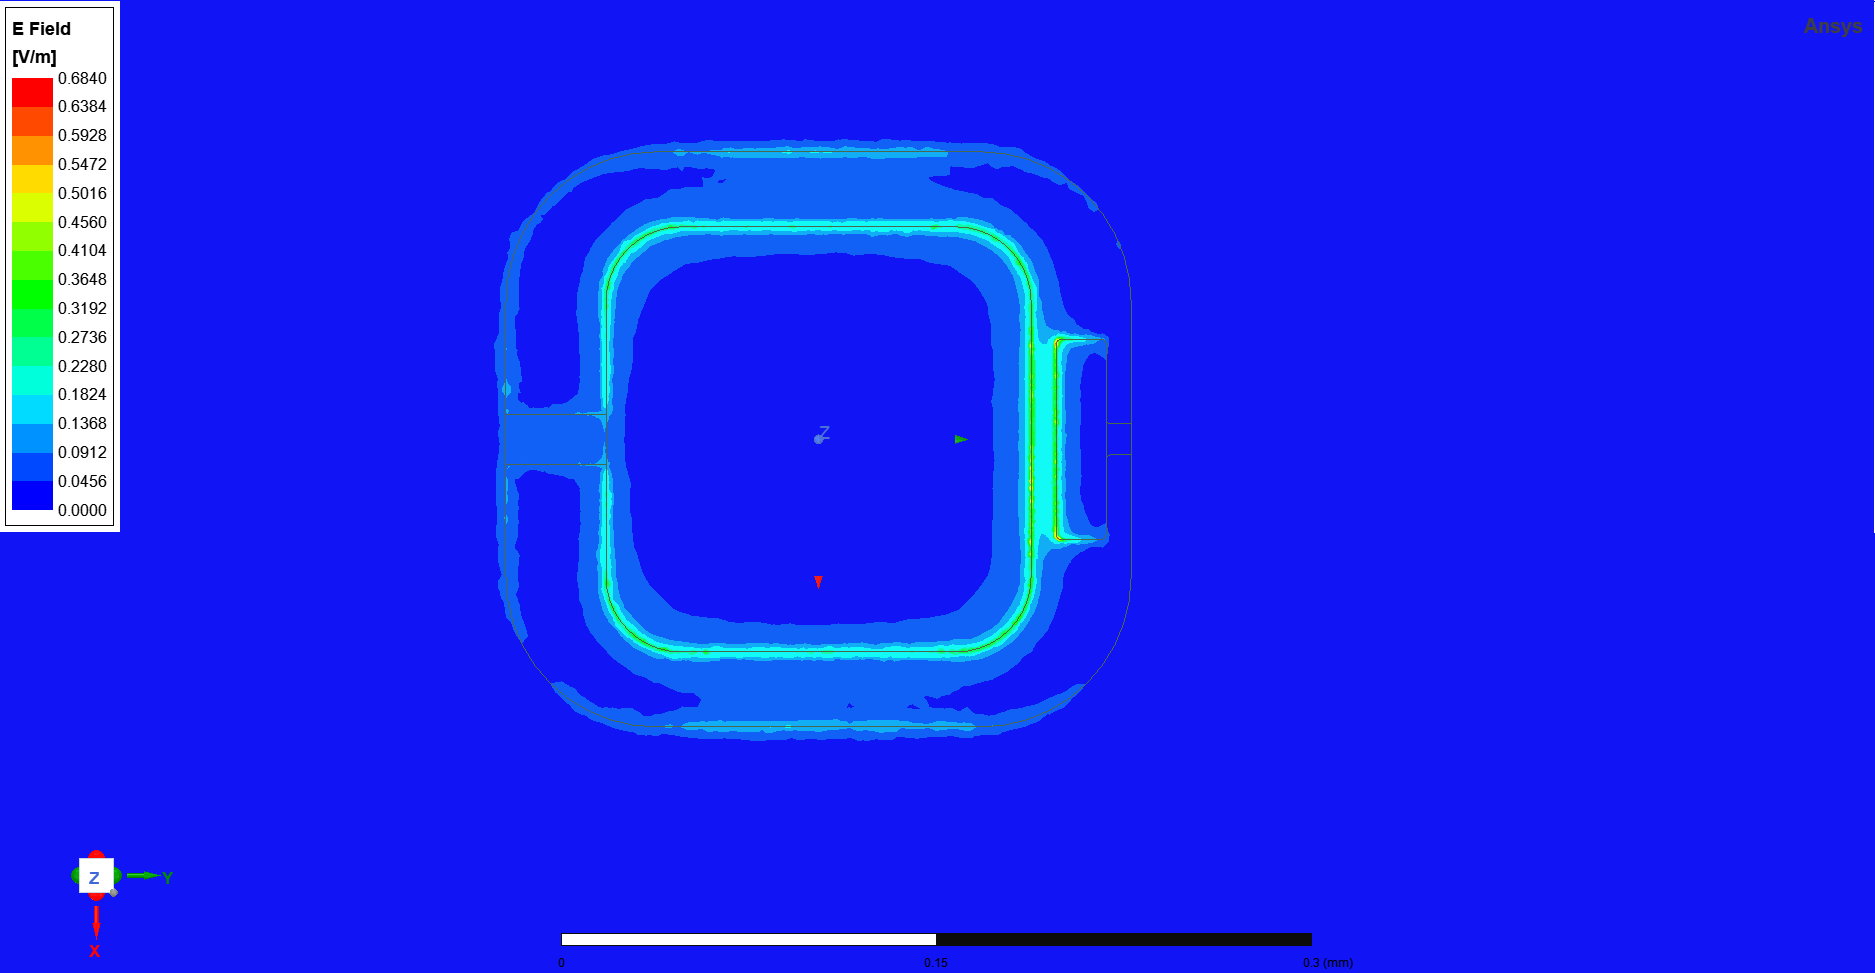

saddd
Design "all_freqs_hfss" info:
	# eigenmodes    1
	# variations    1
Design "all_freqs_hfss" info:
	# eigenmodes    1
	# variations    1


  options=pd.Series(get_instance_vars(self.options)),




        energy_elec_all       = 3.30294729818309e-25
        energy_elec_substrate = 3.03327382611907e-25
        EPR of substrate = 91.8%

        energy_mag    = 1.96512632047986e-27
        energy_mag % of energy_elec_all  = 0.6%
        

Variation 0  [1/1]


  Ljs = pd.Series({})

  Cjs = pd.Series({})

  _Om = pd.Series({})




  Mode 0 at 5.87 GHz   [1/1]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.4%  1.651e-25 9.826e-28

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)


  Qp = pd.Series({})

  sol = sol.append(self.get_Qdielectric(



		Energy fraction (Lj over Lj&Cj)= 97.35%
	jj1              1.05679  (+)        0.0287253
		(U_tot_cap-U_tot_ind)/mean=-1.63%
Calculating Qdielectric_main for mode 0 (0/0)
p_dielectric_main_0 = 0.9183536860511325


  options=pd.Series(get_instance_vars(self.options)),

WARNING 01:35PM [__init__]: <p>Error: <class 'IndexError'></p>
  result['Q_coupling'] = self.Qm_coupling[variation][self.Qm_coupling[variation].columns[junctions]][modes]#TODO change the columns to junctions

  result['Qs'] = self.Qs[variation][self.PM[variation].columns[junctions]][modes] #TODO change the columns to junctions




ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project38\all_freqs_hfss\2023-04-02 13-35-39.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    0.967901
dtype: float64

Pm_norm idx =
    jj1
0  True
*** P (participation matrix, not normlz.)
        jj1
0  1.027285

*** S (sign-bit matrix)
   s_jj1
0     -1
*** P (participation matrix, normalized.)
      0.99

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       260

*** Chi matrix ND (MHz) 
       287

*** Frequencies O1 PT (MHz)
0    5607.083335
dtype: float64

*** Frequencies ND (MHz)
0    5594.273274
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj1,10
0,5594.27


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

,,0
Lj1,,
10,0,287.35


INFO 01:35PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 01:35PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 01:35PM [analyze]: Analyzing setup Setup
INFO 01:36PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpe2ni7pzd.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:36PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmp4jhlrjjg.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:36PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmptn7y4cuu.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 01:36PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpz25ugcb5.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, 

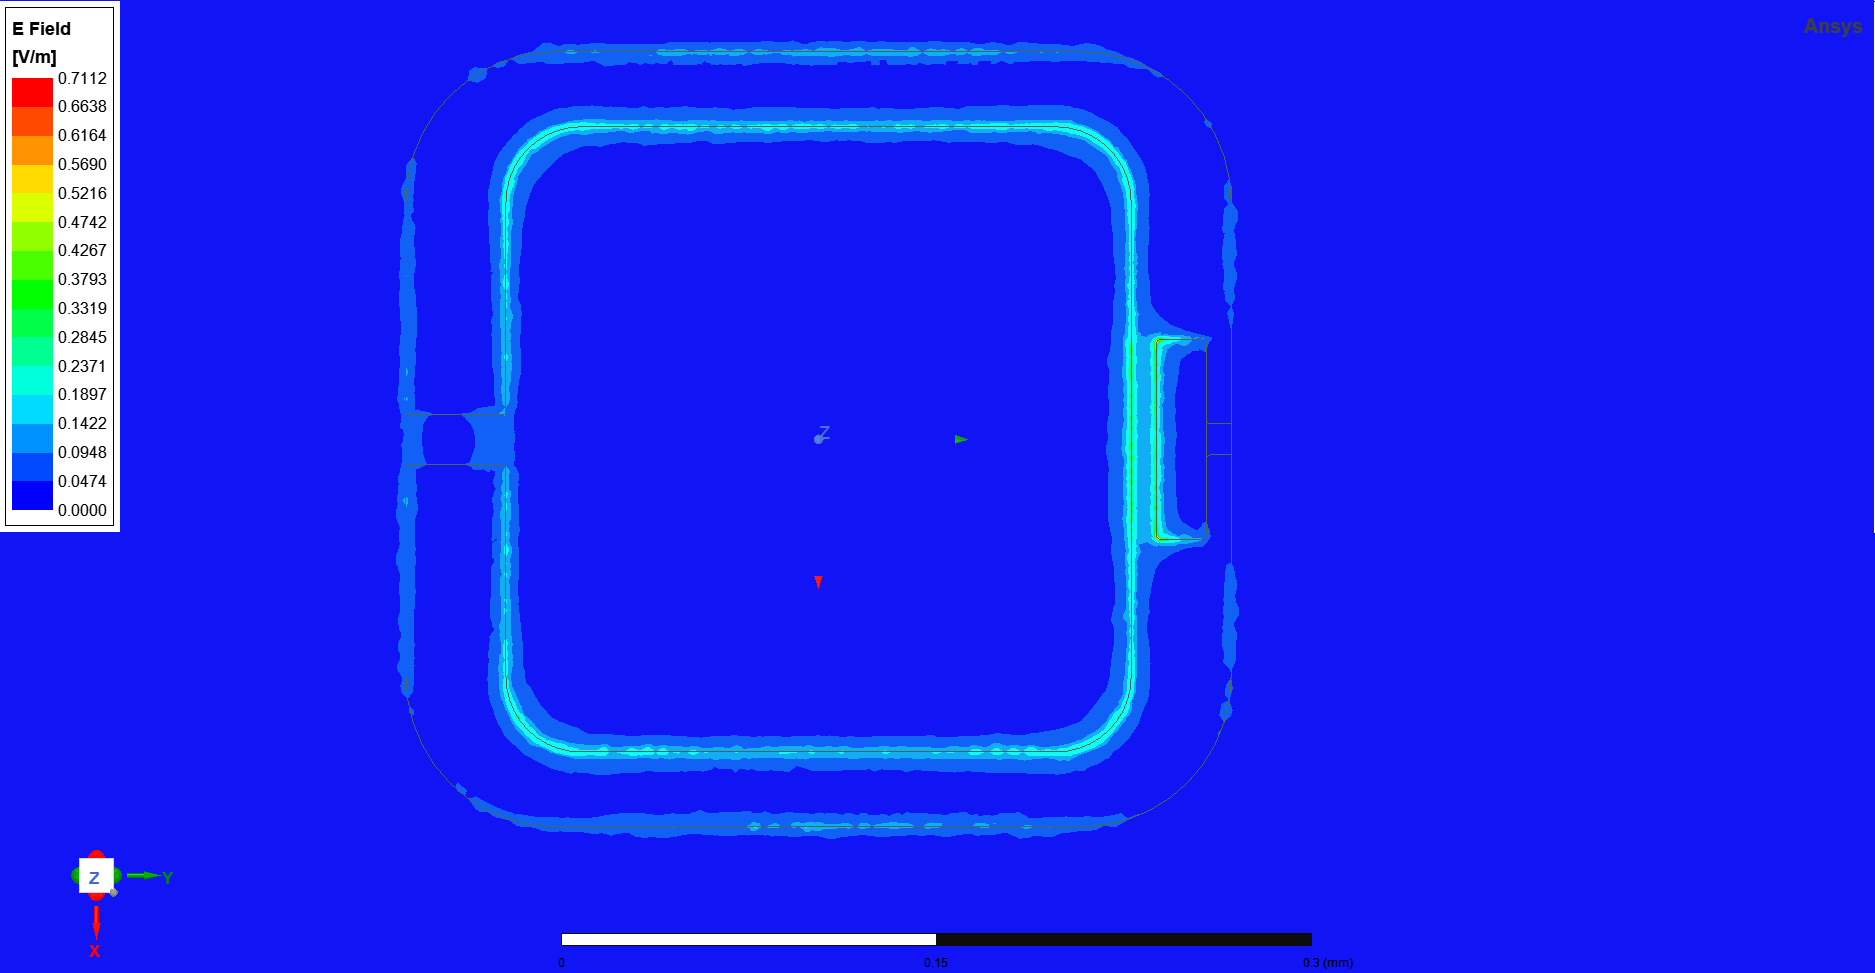

saddd
Design "all_freqs_hfss" info:
	# eigenmodes    1
	# variations    1
Design "all_freqs_hfss" info:
	# eigenmodes    1
	# variations    1


  options=pd.Series(get_instance_vars(self.options)),




        energy_elec_all       = 3.39973299158345e-25
        energy_elec_substrate = 3.11876459854801e-25
        EPR of substrate = 91.7%

        energy_mag    = 3.16689021681434e-27
        energy_mag % of energy_elec_all  = 0.9%
        

Variation 0  [1/1]


  Ljs = pd.Series({})

  Cjs = pd.Series({})

  _Om = pd.Series({})




  Mode 0 at 5.23 GHz   [1/1]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.1%    1.7e-25 1.583e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)


  Qp = pd.Series({})

  sol = sol.append(self.get_Qdielectric(



		Energy fraction (Lj over Lj&Cj)= 98.30%
	jj1              1.03944  (+)        0.0179399
		(U_tot_cap-U_tot_ind)/mean=-1.49%
Calculating Qdielectric_main for mode 0 (0/0)
p_dielectric_main_0 = 0.9173557471333721


  options=pd.Series(get_instance_vars(self.options)),

WARNING 01:38PM [__init__]: <p>Error: <class 'IndexError'></p>
  result['Q_coupling'] = self.Qm_coupling[variation][self.Qm_coupling[variation].columns[junctions]][modes]#TODO change the columns to junctions

  result['Qs'] = self.Qs[variation][self.PM[variation].columns[junctions]][modes] #TODO change the columns to junctions




ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project38\all_freqs_hfss\2023-04-02 13-38-24.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    0.970484
dtype: float64

Pm_norm idx =
    jj1
0  True
*** P (participation matrix, not normlz.)
        jj1
0  1.021125

*** S (sign-bit matrix)
   s_jj1
0      1
*** P (participation matrix, normalized.)
      0.99

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       164

*** Chi matrix ND (MHz) 
       176

*** Frequencies O1 PT (MHz)
0    5063.049483
dtype: float64

*** Frequencies ND (MHz)
0    5057.532122
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj1,8
0,5057.53


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

,,0
Lj1,,
8,0,176.13


INFO 01:38PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 01:38PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 01:38PM [analyze]: Analyzing setup Setup
INFO 01:39PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpx1q0i9gq.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:39PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpz3lxo4vy.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:39PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmprq0l3ycw.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 01:39PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmp5x9411ko.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, 

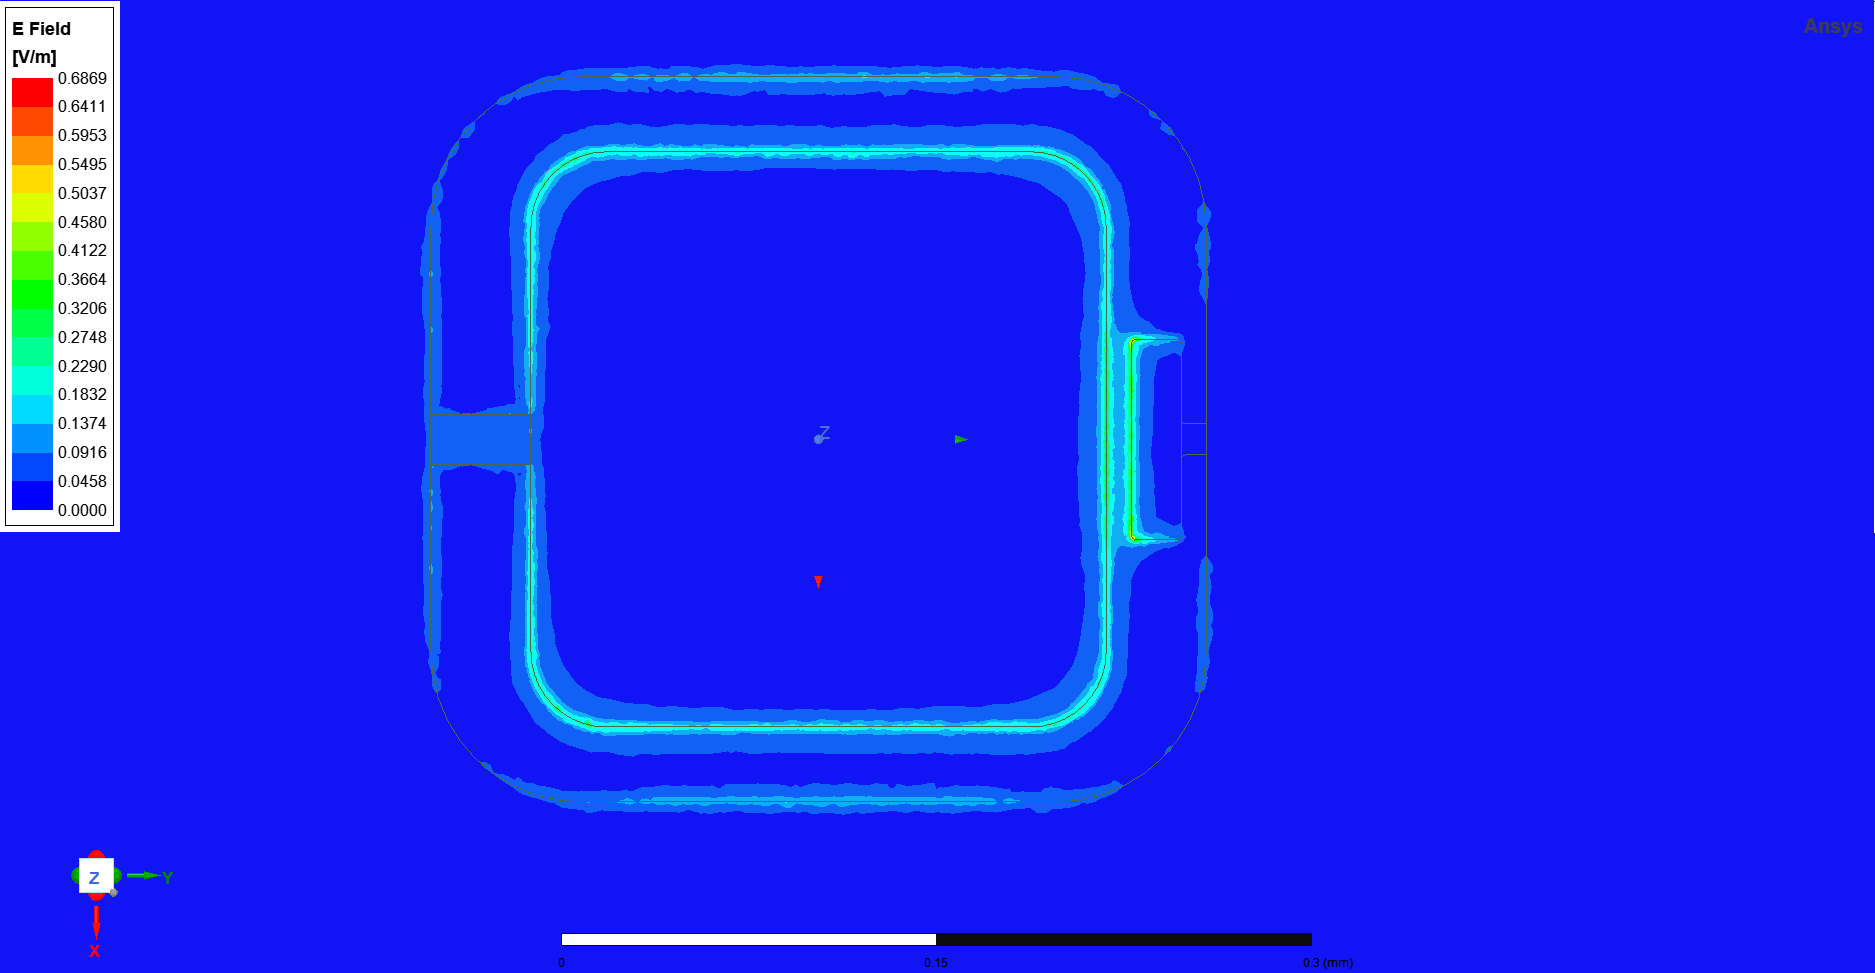

saddd
Design "all_freqs_hfss" info:
	# eigenmodes    1
	# variations    1
Design "all_freqs_hfss" info:
	# eigenmodes    1
	# variations    1


  options=pd.Series(get_instance_vars(self.options)),




        energy_elec_all       = 3.5667439595657e-25
        energy_elec_substrate = 3.27308264272954e-25
        EPR of substrate = 91.8%

        energy_mag    = 1.34008558349242e-26
        energy_mag % of energy_elec_all  = 3.8%
        

Variation 0  [1/1]


  Ljs = pd.Series({})

  Cjs = pd.Series({})

  _Om = pd.Series({})




  Mode 0 at 5.48 GHz   [1/1]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               96.2%  1.783e-25   6.7e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 98.14%
	jj1              1.04544  (+)        0.0198558
		(U_tot_cap-U_tot_ind)/mean=-3.00%
Calculating Qdielectric_main for mode 0 (0/0)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_0 = 0.9176668355886366


  options=pd.Series(get_instance_vars(self.options)),

WARNING 01:41PM [__init__]: <p>Error: <class 'IndexError'></p>
  result['Q_coupling'] = self.Qm_coupling[variation][self.Qm_coupling[variation].columns[junctions]][modes]#TODO change the columns to junctions

  result['Qs'] = self.Qs[variation][self.PM[variation].columns[junctions]][modes] #TODO change the columns to junctions




ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project38\all_freqs_hfss\2023-04-02 13-41-05.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    0.940665
dtype: float64

Pm_norm idx =
    jj1
0  True
*** P (participation matrix, not normlz.)
       jj1
0  1.02509

*** S (sign-bit matrix)
   s_jj1
0     -1
*** P (participation matrix, normalized.)
      0.96

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       171

*** Chi matrix ND (MHz) 
       183

*** Frequencies O1 PT (MHz)
0    5312.404566
dtype: float64

*** Frequencies ND (MHz)
0    5306.873986
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj1,8
0,5306.87


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

,,0
Lj1,,
8,0,183.05


INFO 01:41PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 01:41PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 01:41PM [analyze]: Analyzing setup Setup
INFO 01:42PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpt8ys5nxl.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:42PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpb1dlfmij.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:42PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpw21idtbe.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 01:42PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpuhpva0yq.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, 

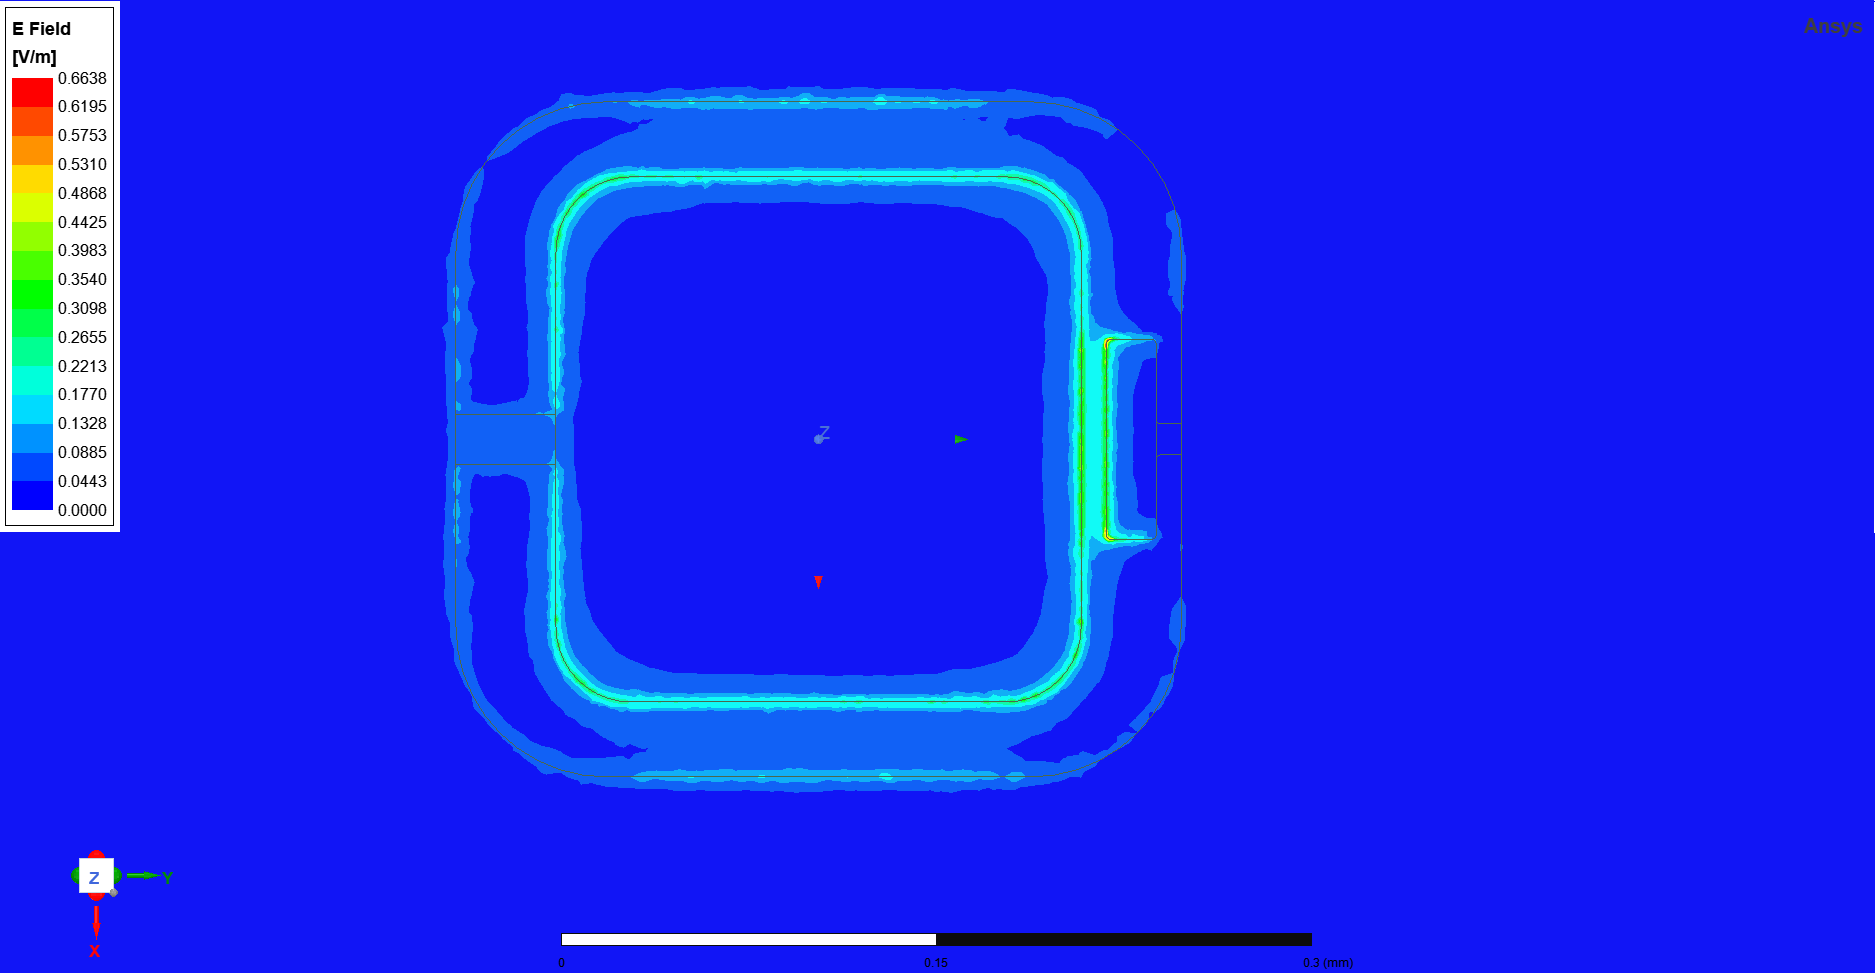

saddd
Design "all_freqs_hfss" info:
	# eigenmodes    1
	# variations    1
Design "all_freqs_hfss" info:
	# eigenmodes    1
	# variations    1


  options=pd.Series(get_instance_vars(self.options)),




        energy_elec_all       = 4.3411668558127e-25
        energy_elec_substrate = 3.98428886771013e-25
        EPR of substrate = 91.8%

        energy_mag    = 3.61580858111188e-27
        energy_mag % of energy_elec_all  = 0.8%
        

Variation 0  [1/1]


  Ljs = pd.Series({})

  Cjs = pd.Series({})

  _Om = pd.Series({})




  Mode 0 at 5.77 GHz   [1/1]
    Calculating ℰ_magnetic,

  Sj = pd.Series({})



ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.2%  2.171e-25 1.808e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)


  Qp = pd.Series({})

  sol = sol.append(self.get_Qdielectric(



		Energy fraction (Lj over Lj&Cj)= 97.94%
	jj1              1.05219  (+)        0.0221284
		(U_tot_cap-U_tot_ind)/mean=-1.84%
Calculating Qdielectric_main for mode 0 (0/0)
p_dielectric_main_0 = 0.9177921512911394


  options=pd.Series(get_instance_vars(self.options)),

WARNING 01:43PM [__init__]: <p>Error: <class 'IndexError'></p>
  result['Q_coupling'] = self.Qm_coupling[variation][self.Qm_coupling[variation].columns[junctions]][modes]#TODO change the columns to junctions

  result['Qs'] = self.Qs[variation][self.PM[variation].columns[junctions]][modes] #TODO change the columns to junctions




ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project38\all_freqs_hfss\2023-04-02 13-43-26.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    0.963662
dtype: float64

Pm_norm idx =
    jj1
0  True
*** P (participation matrix, not normlz.)
        jj1
0  1.029408

*** S (sign-bit matrix)
   s_jj1
0     -1
*** P (participation matrix, normalized.)
      0.99

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       200

*** Chi matrix ND (MHz) 
       217

*** Frequencies O1 PT (MHz)
0    5569.732075
dtype: float64

*** Frequencies ND (MHz)
0    5562.209606
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj1,8
0,5562.21


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

,,0
Lj1,,
8,0,216.67


INFO 01:43PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 01:43PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 01:43PM [analyze]: Analyzing setup Setup
INFO 01:44PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpak3urr2r.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:44PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmp1ep0lfm4.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:44PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpu2bfq2ez.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 01:44PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpa5m6vgfb.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, 

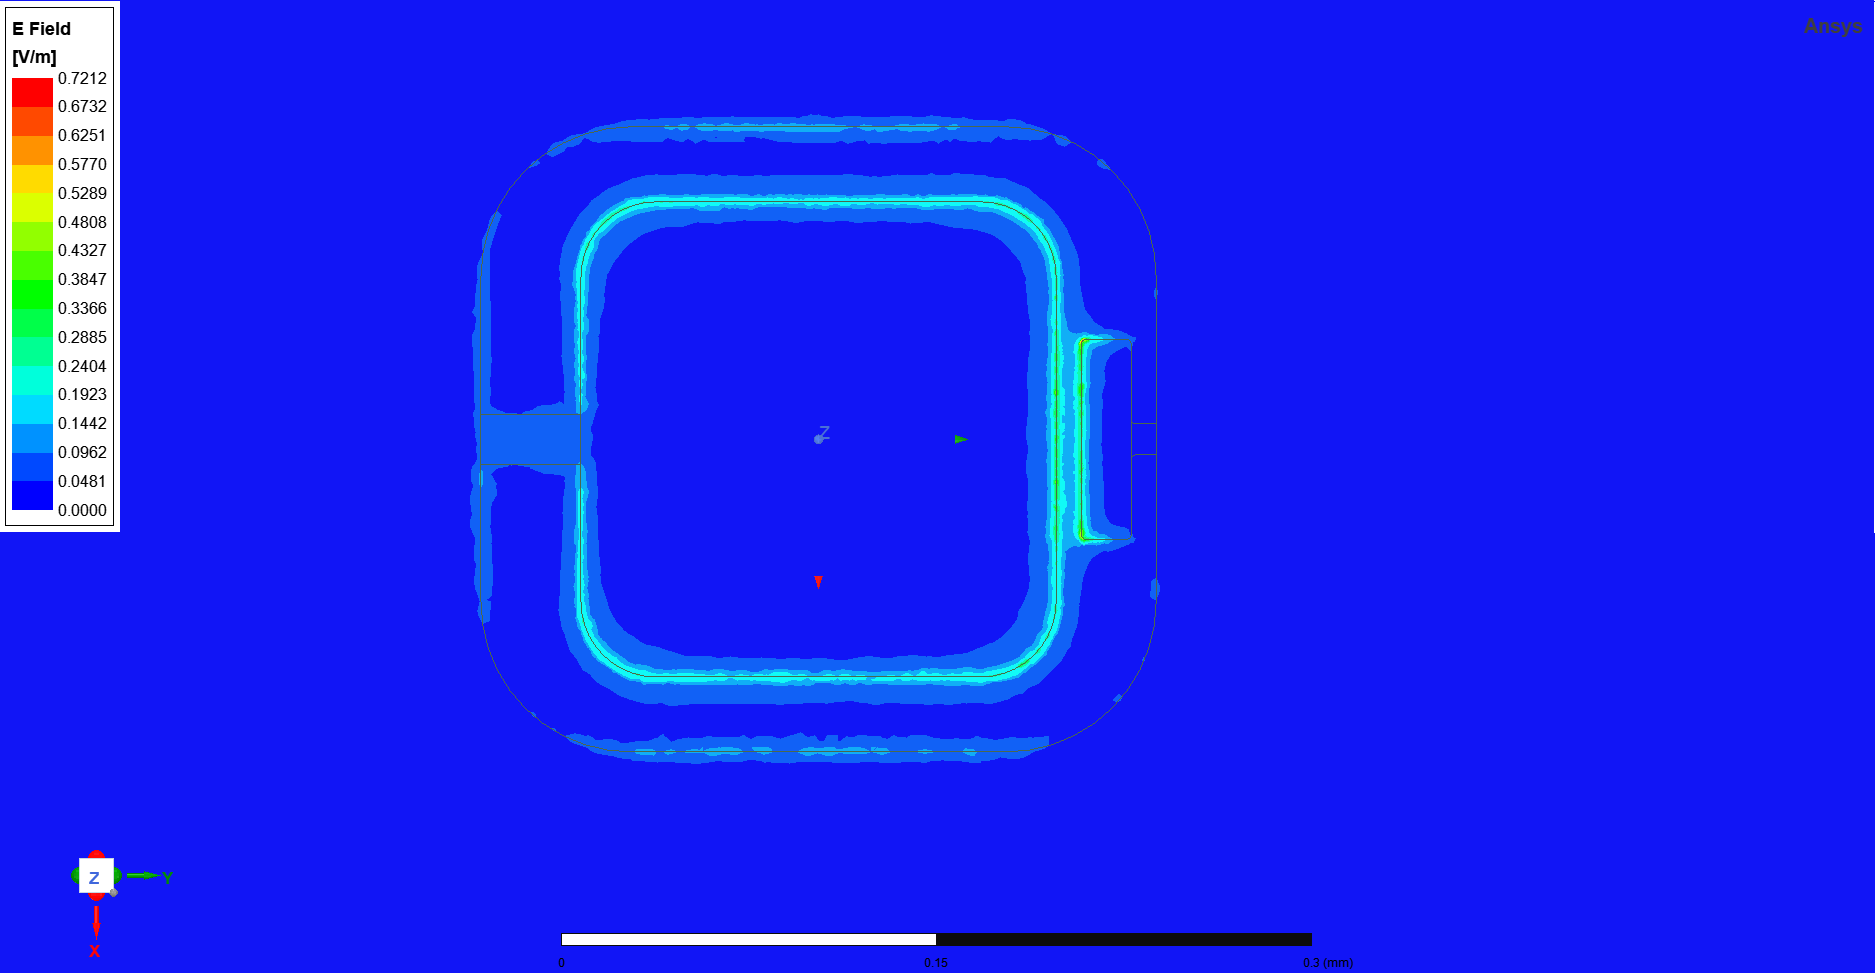

saddd
Design "all_freqs_hfss" info:
	# eigenmodes    1
	# variations    1
Design "all_freqs_hfss" info:
	# eigenmodes    1
	# variations    1


  options=pd.Series(get_instance_vars(self.options)),




        energy_elec_all       = 3.08454116344841e-25
        energy_elec_substrate = 2.83183492778781e-25
        EPR of substrate = 91.8%

        energy_mag    = 2.41747299502228e-27
        energy_mag % of energy_elec_all  = 0.8%
        

Variation 0  [1/1]


  Ljs = pd.Series({})

  Cjs = pd.Series({})

  _Om = pd.Series({})




  Mode 0 at 6.11 GHz   [1/1]
    Calculating ℰ_magnetic,

  Sj = pd.Series({})



ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.2%  1.542e-25 1.209e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)


  Qp = pd.Series({})

  sol = sol.append(self.get_Qdielectric(



		Energy fraction (Lj over Lj&Cj)= 97.70%
	jj1              1.05951  (+)        0.0249679
		(U_tot_cap-U_tot_ind)/mean=-2.03%
Calculating Qdielectric_main for mode 0 (0/0)
p_dielectric_main_0 = 0.9180733138999243


  options=pd.Series(get_instance_vars(self.options)),

WARNING 01:45PM [__init__]: <p>Error: <class 'IndexError'></p>
  result['Q_coupling'] = self.Qm_coupling[variation][self.Qm_coupling[variation].columns[junctions]][modes]#TODO change the columns to junctions

  result['Qs'] = self.Qs[variation][self.PM[variation].columns[junctions]][modes] #TODO change the columns to junctions




ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project38\all_freqs_hfss\2023-04-02 13-45-47.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    0.960147
dtype: float64

Pm_norm idx =
    jj1
0  True
*** P (participation matrix, not normlz.)
        jj1
0  1.033705

*** S (sign-bit matrix)
   s_jj1
0     -1
*** P (participation matrix, normalized.)
      0.99

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       225

*** Chi matrix ND (MHz) 
       244

*** Frequencies O1 PT (MHz)
0    5883.159674
dtype: float64

*** Frequencies ND (MHz)
0    5874.167518
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj1,8
0,5874.17


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

,,0
Lj1,,
8,0,244.15


INFO 01:45PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 01:45PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 01:45PM [analyze]: Analyzing setup Setup
INFO 01:46PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpr6_lyo43.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:46PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpaxp8iajh.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:46PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpdyu_hpsc.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 01:46PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpdtcl6evh.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, 

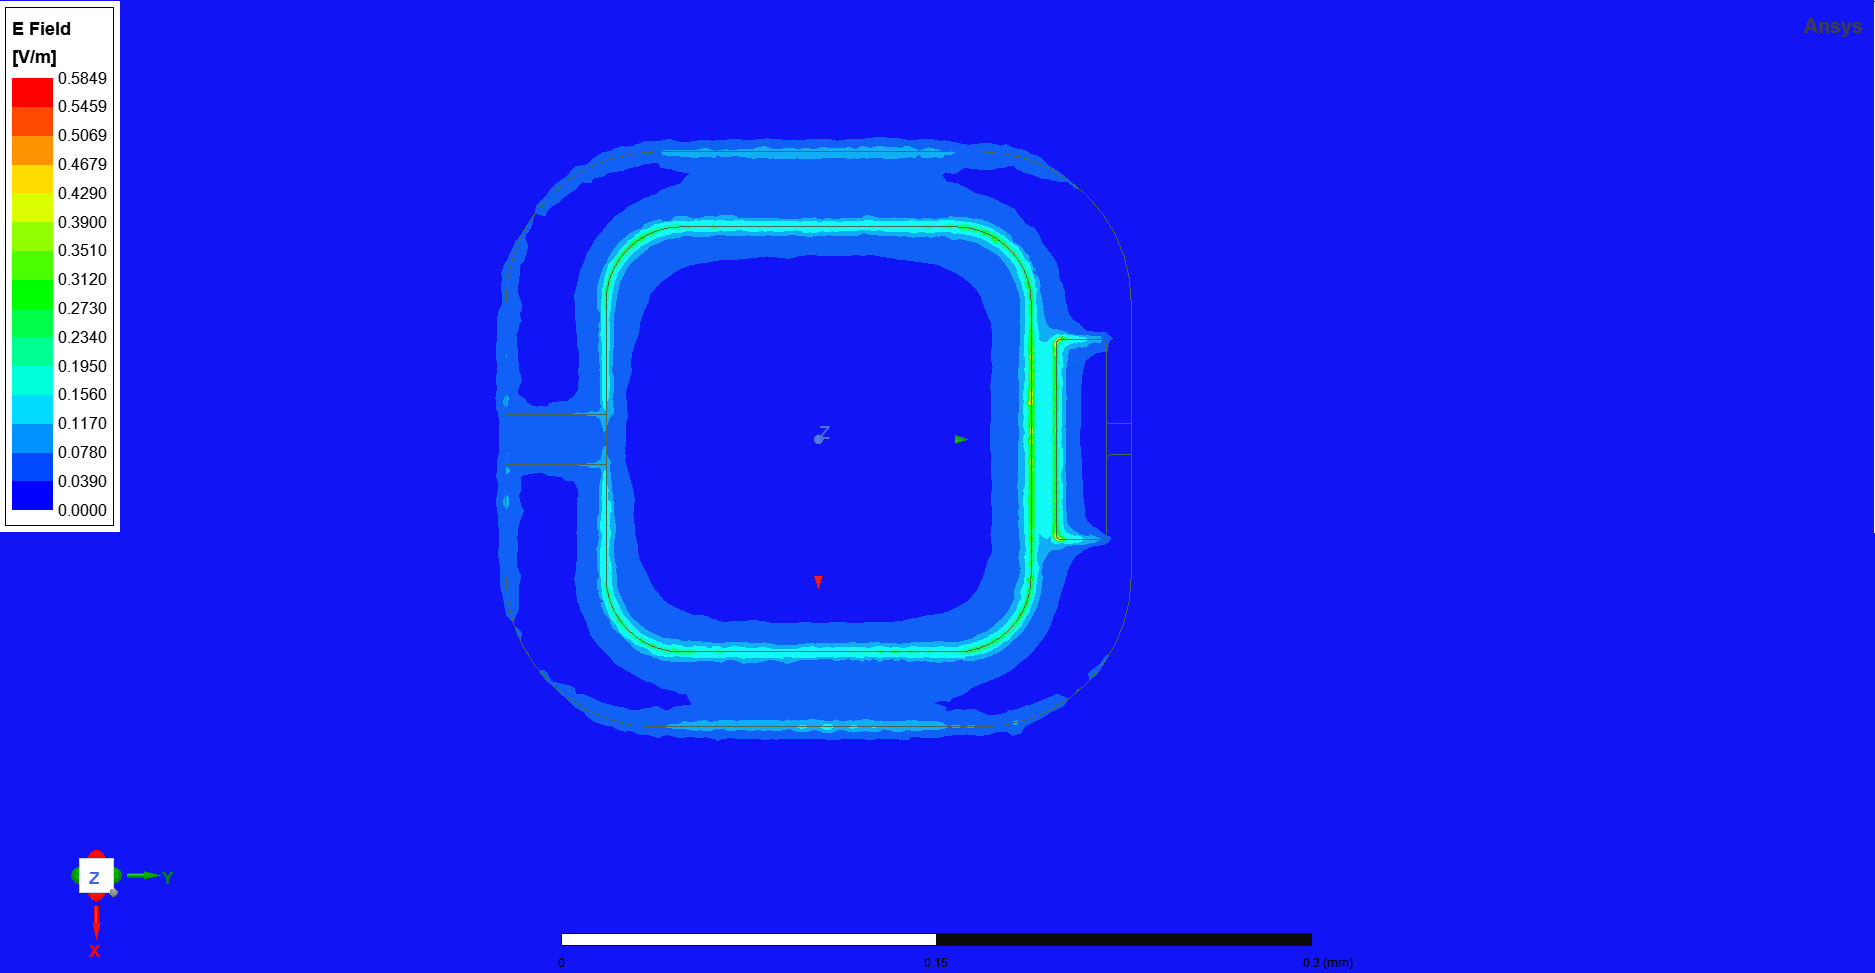

saddd
Design "all_freqs_hfss" info:
	# eigenmodes    1
	# variations    1
Design "all_freqs_hfss" info:
	# eigenmodes    1
	# variations    1


  options=pd.Series(get_instance_vars(self.options)),




        energy_elec_all       = 2.53894418250089e-25
        energy_elec_substrate = 2.33137666356945e-25
        EPR of substrate = 91.8%

        energy_mag    = 1.85698873782968e-27
        energy_mag % of energy_elec_all  = 0.7%
        

Variation 0  [1/1]


  Ljs = pd.Series({})

  Cjs = pd.Series({})

  _Om = pd.Series({})




  Mode 0 at 6.50 GHz   [1/1]
    Calculating ℰ_magnetic,

  Sj = pd.Series({})



ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.3%  1.269e-25 9.285e-28

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)


  Qp = pd.Series({})

  sol = sol.append(self.get_Qdielectric(



		Energy fraction (Lj over Lj&Cj)= 97.40%
	jj1              1.07095  (+)        0.0286109
		(U_tot_cap-U_tot_ind)/mean=-2.36%
Calculating Qdielectric_main for mode 0 (0/0)
p_dielectric_main_0 = 0.9182465213839466


  options=pd.Series(get_instance_vars(self.options)),

WARNING 01:48PM [__init__]: <p>Error: <class 'IndexError'></p>
  result['Q_coupling'] = self.Qm_coupling[variation][self.Qm_coupling[variation].columns[junctions]][modes]#TODO change the columns to junctions

  result['Qs'] = self.Qs[variation][self.PM[variation].columns[junctions]][modes] #TODO change the columns to junctions




ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project38\all_freqs_hfss\2023-04-02 13-47-59.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    0.953795
dtype: float64

Pm_norm idx =
    jj1
0  True
*** P (participation matrix, not normlz.)
        jj1
0  1.041164

*** S (sign-bit matrix)
   s_jj1
0      1
*** P (participation matrix, normalized.)
      0.99

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       255

*** Chi matrix ND (MHz) 
       279

*** Frequencies O1 PT (MHz)
0    6248.239289
dtype: float64

*** Frequencies ND (MHz)
0    6237.288424
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj1,8
0,6237.29


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

,,0
Lj1,,
8,0,278.57


01:48PM 04s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  CRITICAL: QEventDispatcherWin32::wakeUp: Failed to post a message (Not enough quota is available to process this command.)

01:48PM 05s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  CRITICAL: QEventDispatcherWin32::wakeUp: Failed to post a message (Not enough quota is available to process this command.)



In [31]:
nmode = 1
d = []
for Lj in ['10nH', '8nH']:
    Cj = jj.find_junction_capacitance(int(Lj[:-2])*u.nH)
    for size in np.linspace(250,170,5)*u.um:
        dat = {}
        dat['Lj (nH)'] = int(Lj[:-2])
        dat['size (um)'] = size
        dat['Cj (fF)'] = Cj.to(u.fF).value
        Cj1 = str(Cj.to(u.fF).value)+' fF'
        

        eig_all.sim.renderer.options['Lj'] = Lj
        eig_all.sim.renderer.options['Cj'] = Cj1

        eig_all.sim.setup.vars = Dict(Lj1= Lj, Cj1= Cj1)

        # gap1 = 0.055
        gap = 30*u.um
        size = size.to(u.um)
        pocket_width = size+2*gap

        # coupling_len = extend
        q1.options['pad_height'] = '{}'.format(size)
        q1.options['pad_width'] = '{}'.format(size)
        q1.options['pocket_width'] = '{}'.format(pocket_width)
        
        qcomps = design.components 
        qcomps['Q1'].options['hfss_inductance'] = Lj
        qcomps['Q1'].options['hfss_capacitance'] = Cj1
        
        gui.rebuild()

        c1.sim.run(components=['Q1'])#, open_terminations=[('Q1', 'a')])#, ('Q1', 'bus1'), ('Q1', 'bus2')])
        c1.sim.capacitance_matrix 

        c1.sim._get_results_from_renderer()
        c_mat1 = c1.sim.capacitance_matrix
        renderer_q3d.clean_active_design()
        d += [c_mat1]
        dat['C_CPW_Qb'] = -c_mat1['a_connector_pad_Q1']['pad_top_Q1']


        # c1.sim.run(components=['Q1'], open_terminations=[('Q1', 'a')])#, ('Q1', 'bus1'), ('Q1', 'bus2')])
        # c1.sim.capacitance_matrix 

        # c1.sim._get_results_from_renderer()
        # c_mat1 = c1.sim.capacitance_matrix
        # renderer_q3d.clean_active_design()
        # dat['C_CPW_Qb_g'] = c_mat1


        eig_all.sim.run(name="all_freqs", components=['Q1'])#, open_terminations=[('Q1', 'a')])
        convergence = pd.read_csv('hfss_eig_f_convergence.csv')
        conv = convergence.dropna()

        
        ind = list(conv.keys())[1:]
        freq = conv[ind[0]].values[-1]
        dat['Freq_conv(GHz)'] = freq

        for i in range(nmode):
                hfss.modeler._modeler.ShowWindow()
                hfss.set_mode(i+1,'Setup')
                hfss.plot_ansys_fields('main')
                hfss.save_screenshot()
                hfss.clear_fields(['main'])
                
                actual = r'C:\Users\slab\Desktop\Wendy-qiskit-code\size{:.3f}'.format((size.value))+Lj+'.png'
                os.rename(original, actual)
                fail = True
                i = 0
                while fail:

                    try:
                        dest = shutil.move(actual, path)
                    except:
                        i+= 1
                        os.rename(actual,(actual+'{}'.format(i)))
                        actual = (actual+'{}'.format(i))
                    else:
                        fail = False


        try:
            del eig_all.setup.junctions['jj']
        except:
            print('saddd')
        eig_all.setup.junctions.jj1 = Dict(rect='JJ_rect_Lj_Q1_rect_jj', line='JJ_Lj_Q1_rect_jj_',
                        Lj_variable='Lj1', Cj_variable='Cj1')
        eig_all.setup.sweep_variable = 'Lj1'
        eig_all.run_epr()

        #Save the EPR data
        chi = eig_all.sim.renderer.epr_quantum_analysis.get_chis().to_numpy()
        freq_EPR= eig_all.sim.renderer.epr_quantum_analysis.get_frequencies().to_numpy()[:,0]
        
        renderer_hfss.clean_active_design()
        for i in range(nmode):
            freq = freq_EPR[i]
            dat['Freq_EPR'+str(i+1)+'(MHz)'] = freq
            for j in range(i+1):
                dat['Chi'+str(i+1)+'_'+str(j+1)+'(MHz)'] = chi[i][j]

        data = pd.DataFrame(dat, index = [0])
        datas = pd.concat([datas,data], ignore_index=True)


        datas.to_csv('data\QB_freq_only_0403.csv')





        

In [25]:
for i in range(1):
    print(i)

0


In [31]:
c1.sim.run(components=['Q1'], open_terminations=[('Q1', 'a')])

INFO 06:57PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]


com_error: (-2147023170, 'The remote procedure call failed.', None, None)